<a href="https://colab.research.google.com/github/Celine96/portfolio/blob/main/Udemy_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path

In [21]:
google_trend = pd.read_csv('/content/drive/MyDrive/portfolio/google_trend.csv')
google_trend

,,카테고리: 모든 카테고리
월,EDX: (미국),Udemy: (미국)
2004-01,4,2
2004-02,1,0
2004-03,2,0
2004-04,3,0
...,...,...
2023-03,15,82
2023-04,14,78
2023-05,16,87
2023-06,21,84


In [28]:
google_trend.index

MultiIndex([(      '월', 'EDX: (미국)'),
            ('2004-01',         '4'),
            ('2004-02',         '1'),
            ('2004-03',         '2'),
            ('2004-04',         '3'),
            ('2004-05',         '3'),
            ('2004-06',         '4'),
            ('2004-07',         '1'),
            ('2004-08',         '2'),
            ('2004-09',         '3'),
            ...
            ('2022-10',        '14'),
            ('2022-11',        '14'),
            ('2022-12',        '14'),
            ('2023-01',        '15'),
            ('2023-02',        '16'),
            ('2023-03',        '15'),
            ('2023-04',        '14'),
            ('2023-05',        '16'),
            ('2023-06',        '21'),
            ('2023-07',        '16')],
           length=236)

In [40]:
google_trend.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 236 entries, ('월', 'EDX: (미국)') to ('2023-07', '16')
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   카테고리: 모든 카테고리  236 non-null    object
dtypes: object(1)
memory usage: 13.8+ KB


In [55]:
google_trend = google_trend.sort_index(level=[0,1])

In [160]:
idx = pd.IndexSlice
google_trend_v2 = google_trend.loc[idx["2017-01":"2023-01", :], :]

In [161]:
google_trend_v2.to_csv('google_trend_v3.csv')

In [162]:
google_trend_v2

,,카테고리: 모든 카테고리
2017-01,22,44
2017-02,23,43
2017-03,22,44
2017-04,21,43
2017-05,22,47
...,...,...
2022-09,16,86
2022-10,14,78
2022-11,14,86
2022-12,14,82


In [78]:
edx_courses = pd.read_csv('/content/drive/MyDrive/portfolio/edx_courses.csv')
edx_courses

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

In [79]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

In [80]:
edx_courses.dtypes

title                 object
summary               object
n_enrolled            object
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
course_syllabus       object
course_url            object
dtype: object

In [81]:
edx = edx_courses

In [82]:
#data processing

edx['n_enrolled'] = edx['n_enrolled'].str.replace(',','')
edx['price'] = edx['price'].str.replace('FREE-Add a Verified Certificate for','')
edx['price'] = edx['price'].str.replace('USD','')
edx['price'] = edx['price'].str.replace('$','')
edx['price'] = edx['price'].str.strip()
edx['course_length'] = edx['course_length'].str.replace('Weeks','')

<ipython-input-82-dd216618471a>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  edx['price'] = edx['price'].str.replace('$','')


In [83]:
edx['n_enrolled'] = edx['n_enrolled'].fillna(0)
edx['n_enrolled'] = edx['n_enrolled'].astype(int)

In [84]:
edx['price'] = edx['price'].astype(float)

In [85]:
edx['course_length'] = edx['course_length'].astype(int)

In [86]:
edx_courses.dtypes

title                  object
summary                object
n_enrolled              int64
course_type            object
institution            object
instructors            object
Level                  object
subject                object
language               object
subtitles              object
course_effort          object
course_length           int64
price                 float64
course_description     object
course_syllabus        object
course_url             object
dtype: object

In [87]:
edx.isnull().sum()

title                   0
summary                53
n_enrolled              0
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [88]:
edx['summary'] = edx['summary'].fillna('unlisted')
edx['instructors'] = edx['instructors'].fillna('unlisted')
edx['subtitles'] = edx['subtitles'].fillna('unlisted')
edx['course_description'] = edx['course_description'].fillna('unlisted')
edx['course_syllabus'] = edx['course_syllabus'].fillna('unlisted')

In [89]:
edx.isnull().sum()

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
instructors           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_syllabus       0
course_url            0
dtype: int64

In [90]:
edx['course_length'].unique()

array([ 2,  7, 12, 13,  4,  6, 10,  8,  5, 16, 15,  1, 11, 14,  9,  3, 18,
       17])

In [91]:
edx['Level'].unique()

array(['Introductory', 'Intermediate', 'Advanced'], dtype=object)

In [92]:
edx['Level'] = edx['Level'].astype('category') #categorical type
edx['Level'] = edx['Level'].cat.codes

In [93]:
edx['course_type'].unique()

array(['Self-paced on your time', 'Instructor-led on a course schedule'],
      dtype=object)

In [94]:
edx['course_type'] = edx['course_type'].astype('category')
edx['course_type'] = edx['course_type'].cat.codes

In [95]:
edx.describe()

,n_enrolled,course_type,Level,course_length,price
count,9.750000e+02,975.000000,975.000000,975.000000,975.000000
mean,4.670523e+04,0.940513,1.547692,6.705641,100.465497
std,1.128239e+05,0.236656,0.653165,3.150327,69.572175
min,0.000000e+00,0.000000,0.000000,1.000000,5.000000
25%,8.529500e+03,1.000000,1.000000,4.000000,49.000000
50%,1.968700e+04,1.000000,2.000000,6.000000,79.000000
75%,4.891850e+04,1.000000,2.000000,8.000000,149.000000
max,2.442271e+06,1.000000,2.000000,18.000000,450.000000


In [96]:
edx['subject'].value_counts()

Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Food & Nutrition                  6
Philosophy & Ethics               6
Chemistry                         5
Architecture                

In [97]:
edx.to_csv('/content/drive/MyDrive/portfolio/edx_for_bigquery.csv')

In [98]:
#pandas 에서 sql 사용하기
Path('edx.db').touch()
edx_conn = sqlite3.connect('edx.db')
edx_cursor = edx_conn.cursor()

In [99]:
edx_conn

In [29]:
#edx_cursor.execute("select * from edx")

OperationalError: ignored

In [103]:
edx.to_sql('edx', edx_conn, if_exists='append', index=False)

975

In [104]:
edx_init_query = pd.read_sql(''' select * from edx ''', edx_conn)
edx_init_query

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,1,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,2,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,1,The University of Michigan,Charles Severance,2,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,unlisted,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,1,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,2,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",unlisted,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,0,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,1,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",unlisted,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,1,"University of California, Berkeley",Stephan Sorger,2,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,unlisted,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,1,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,1,Social Sciences,English,English,4–5 hours per week,10,25.0,The high rates of crime and violence are two o...,unlisted,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,1,Tsinghua University,Yuehua Nie,2,Art & Culture,中文,"English, 中文",3–5 hours per week,12,139.0,Are you an original designer? Or a DIY fancier...,unlisted,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,1,École polytechnique fédérale de Lausanne,Wulfram Gerstner,0,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,1,SDG Academy,Jeffrey D. Sachs,2,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/course/cities-and-the-chal...


In [105]:
pd.read_sql('''select distinct subject
               from edx''',edx_conn )

,subject
0,Education & Teacher Training
1,Computer Science
2,Data Analysis & Statistics
3,Business & Management
4,Communication
5,Health & Safety
6,Math
7,Humanities
8,Ethics
9,Economics & Finance


In [115]:
edx_by_n_enrolled_subject = pd.read_sql(''' SELECT subject, title, sum(n_enrolled) as n_enrolled
                             FROM (SELECT subject, title, n_enrolled
                             FROM edx
                             order by n_enrolled desc limit 10)
                             GROUP BY subject
                             ORDER BY n_enrolled DESC
                             ''', edx_conn)
edx_by_n_enrolled_subject

,subject,title,n_enrolled
0,Computer Science,CS50's Introduction to Computer Science,3783309
1,Communication,IELTS Academic Test Preparation,2526435
2,Data Analysis & Statistics,Data Science: R Basics,528782
3,Social Sciences,The Science of Happiness,475614
4,Business & Management,Contract Law: From Trust to Promise to Contract,414181
5,Architecture,The Architectural Imagination,406181


In [116]:
2442271+698950+642088

3783309

In [109]:
edx_title_by_n_enrolled = pd.read_sql(''' SELECT subject, title, n_enrolled
                             FROM edx
                             ORDER BY n_enrolled DESC
                             limit 10''', edx_conn)
edx_title_by_n_enrolled

,subject,title,n_enrolled
0,Computer Science,CS50's Introduction to Computer Science,2442271
1,Communication,IELTS Academic Test Preparation,1103777
2,Communication,TOEFL® Test Preparation: The Insider’s Guide,1022489
3,Computer Science,CS50's Web Programming with Python and JavaScript,698950
4,Computer Science,Introduction to Linux,642088
5,Data Analysis & Statistics,Data Science: R Basics,528782
6,Social Sciences,The Science of Happiness,475614
7,Business & Management,Contract Law: From Trust to Promise to Contract,414181
8,Architecture,The Architectural Imagination,406181
9,Communication,Basic Spanish 1: Getting Started,400169


In [110]:
edx_title_by_n_enrolled.to_csv('edx_title_by_n_enrolled.csv')

In [107]:
pd.read_sql(''' select subject, count(subject) as cnt
                from (SELECT subject, title, sum(n_enrolled) as n_enrolled
                             FROM edx
                             GROUP BY title
                             ORDER BY n_enrolled DESC
                             limit 10)
                group by subject
                ''', edx_conn)

,subject,cnt
0,Architecture,1
1,Business & Management,1
2,Communication,3
3,Computer Science,3
4,Data Analysis & Statistics,1
5,Social Sciences,1


## 1. Contents
### 1. EDX에서 가장 많이 구독하는 과정 10개중 3개가 computer science 와 communication이다.

### 2. computer science>business & management > communication  순서로 수강생이 가장 많은 반면 computer science>business & management > data analysis & statistics 순서로 개설된 수업이 많다.

In [169]:
edx_by_n_enrolled2 = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count, sum(n_enrolled) as n_enrolled
                             FROM edx
                             GROUP BY subject
                             ORDER BY subject_count DESC
                             ''', edx_conn)
edx_by_n_enrolled2

,subject,subject_count,n_enrolled
0,Computer Science,166,12447737
1,Business & Management,164,7076563
2,Data Analysis & Statistics,72,4264412
3,Humanities,64,3504140
4,Engineering,58,1396839
5,Social Sciences,51,1844379
6,Economics & Finance,46,835907
7,Communication,39,4641327
8,Biology & Life Sciences,35,1763832
9,Language,34,1063257


In [170]:
edx_by_n_enrolled = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count, sum(n_enrolled) as n_enrolled
                             FROM edx
                             GROUP BY subject
                             ORDER BY n_enrolled DESC
                             ''', edx_conn)
edx_by_n_enrolled

,subject,subject_count,n_enrolled
0,Computer Science,166,12447737
1,Business & Management,164,7076563
2,Communication,39,4641327
3,Data Analysis & Statistics,72,4264412
4,Humanities,64,3504140
5,Social Sciences,51,1844379
6,Biology & Life Sciences,35,1763832
7,Engineering,58,1396839
8,Language,34,1063257
9,Medicine,31,989765


<Axes: xlabel='subject_count', ylabel='subject'>

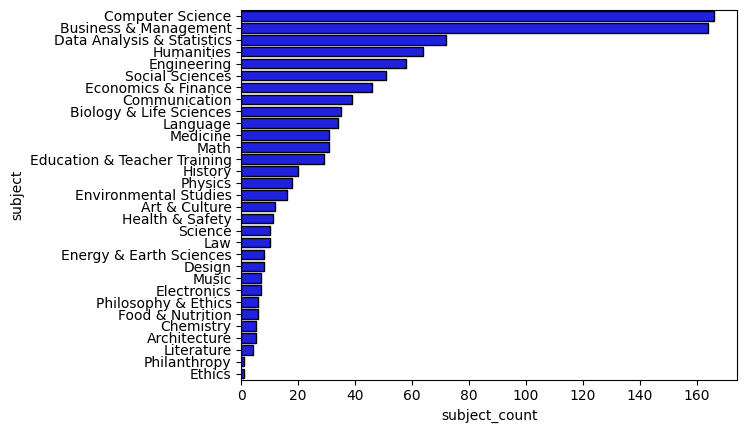

In [171]:
sns.barplot(x = 'subject_count', y = 'subject', data = edx_by_n_enrolled2, color = 'blue', edgecolor='black')

<Axes: xlabel='n_enrolled', ylabel='subject'>

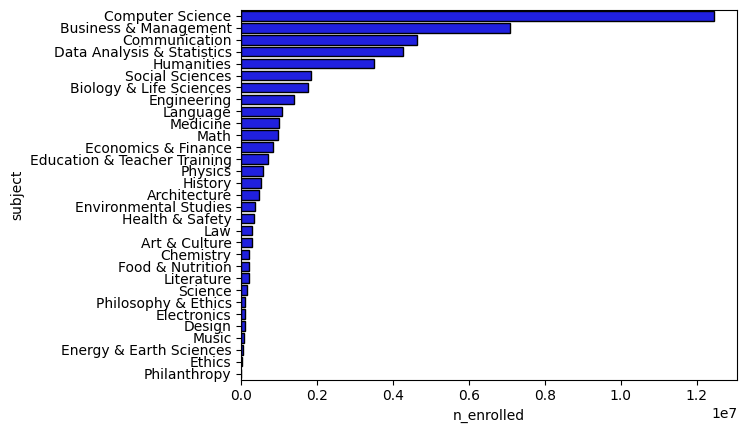

In [172]:
sns.barplot(x = 'n_enrolled', y = 'subject', data = edx_by_n_enrolled, color = 'blue', edgecolor='black')

In [173]:
query1 = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                        FROM edx
                        WHERE subject in ('Data Analysis & Statistics', 'Computer Science')
                        ORDER BY price DESC LIMIT 15 ''', edx_conn )

In [174]:
query1

,title,price,course_effort,n_enrolled,institution
0,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
1,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
2,Python for Data Science,350.0,8–10 hours per week,266978,"The University of California, San Diego"
3,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
4,Machine Learning Fundamentals,350.0,8–10 hours per week,82008,"The University of California, San Diego"
5,Probability - The Science of Uncertainty and Data,300.0,10–14 hours per week,205615,Massachusetts Institute of Technology
6,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
7,Network and Security Foundations,299.7,9–10 hours per week,7301,Western Governors University
8,Scripting and Programming Foundations,299.7,9–10 hours per week,0,Western Governors University
9,Cloud Computing for Enterprises,299.0,8–10 hours per week,27241,University System of Maryland-University of Ma...


<Axes: xlabel='price', ylabel='title'>

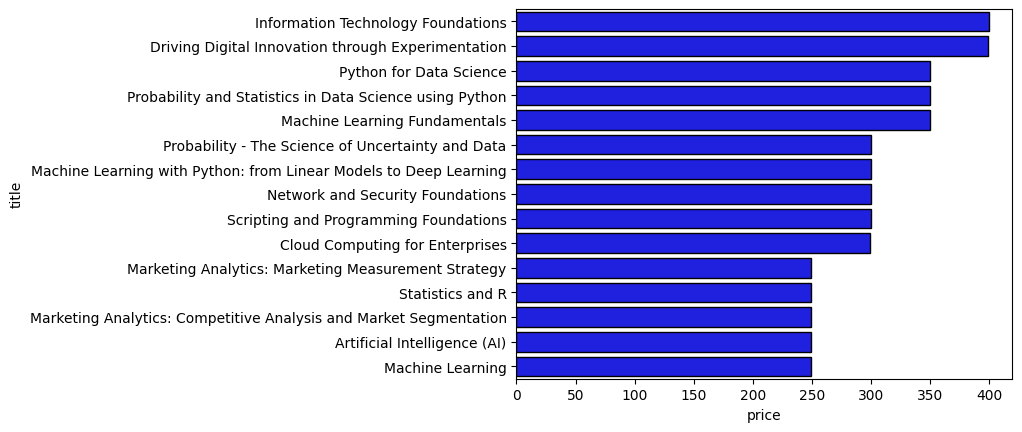

In [175]:
sns.barplot(x = 'price', y = 'title', data = query1, color = 'blue', edgecolor='black')

<Axes: xlabel='n_enrolled', ylabel='title'>

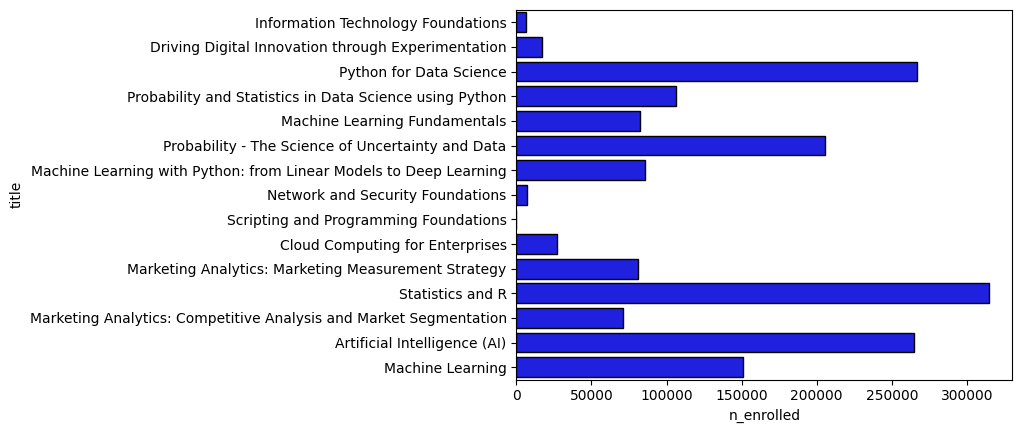

In [176]:
sns.barplot(x= 'n_enrolled', y='title', data = query1, color='blue', edgecolor='black')

<Axes: xlabel='price', ylabel='n_enrolled'>

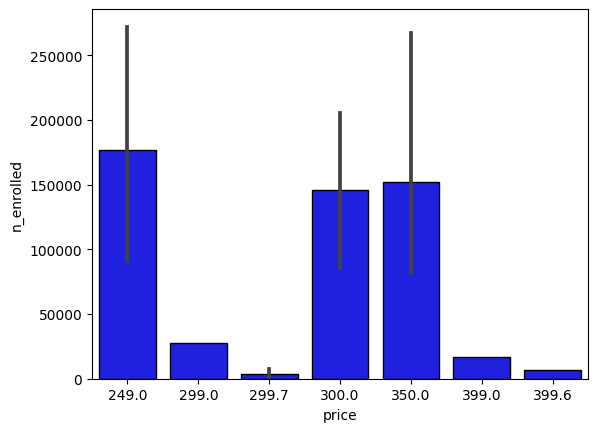

In [177]:
sns.barplot(x='price', y='n_enrolled', data= query1, color='blue', edgecolor='black')

In [178]:
query1.mean()

<ipython-input-178-f1b5a2643633>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  query1.mean()


price            306.133333
n_enrolled    112443.266667
dtype: float64

In [179]:
title_python = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edx
                                       WHERE title LIKE '%Python'
                                       ORDER BY price DESC  ''', edx_conn)
title_python

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
1,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University
2,CS50's Introduction to Artificial Intelligence...,199.0,10–30 hours per week,258006,Harvard University
3,Data Science: Computational Thinking with Python,199.0,4–6 hours per week,78232,"University of California, Berkeley"
4,Estructuras de Datos con Python,49.0,2–4 hours per week,0,The University of Michigan
5,Advanced Algorithmics and Graph Theory with Py...,49.0,2–4 hours per week,13502,IMT
6,Analyzing Data with Python,39.0,2–4 hours per week,94079,IBM
7,Visualizing Data with Python,39.0,2–4 hours per week,42101,IBM


<ipython-input-180-5d976c0b66ab>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'price', y = 'n_enrolled', data = title_python, color = 'orange', edgecolor='black', ci=False)


<Axes: xlabel='price', ylabel='n_enrolled'>

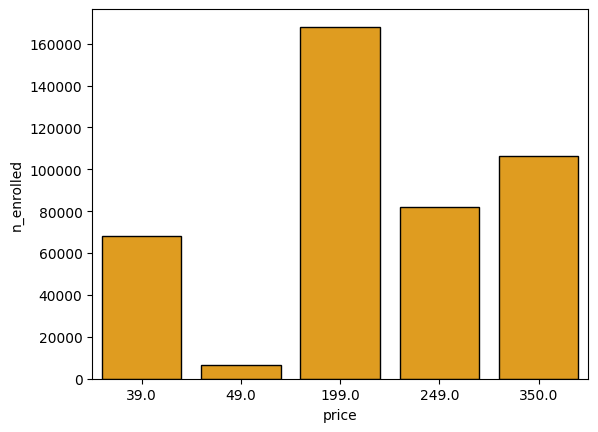

In [180]:
sns.barplot(x = 'price', y = 'n_enrolled', data = title_python, color = 'orange', edgecolor='black', ci=False)

In [181]:
title_Programming = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edx
                                       WHERE title LIKE '%Programming'
                                       ORDER BY price DESC  ''', edx_conn)
title_Programming

,title,price,course_effort,n_enrolled,institution
0,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
1,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
2,Computing in Python I: Fundamentals and Proced...,99.0,9–10 hours per week,141966,The Georgia Institute of Technology
3,AI Chatbots without Programming,99.0,2–4 hours per week,35440,IBM


In [182]:
title_stat = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edx
                                     WHERE title LIKE '%Statistics'
                                     ORDER BY price DESC ''', edx_conn)
title_stat

,title,price,course_effort,n_enrolled,institution
0,BioStatistics,79.0,5–10 hours per week,14937,Doane University
1,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide
2,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund
3,Public Sector Debt Statistics,25.0,6–8 hours per week,0,The International Monetary Fund


In [183]:
title_comp_sci = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                 FROM edx WHERE subject == 'Computer Science'
                                 ORDER BY price DESC LIMIT 15 ''', edx_conn)
title_comp_sci

,title,price,course_effort,n_enrolled,institution
0,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
1,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
2,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
3,Network and Security Foundations,299.7,9–10 hours per week,7301,Western Governors University
4,Scripting and Programming Foundations,299.7,9–10 hours per week,0,Western Governors University
5,Cloud Computing for Enterprises,299.0,8–10 hours per week,27241,University System of Maryland-University of Ma...
6,Marketing Analytics: Marketing Measurement Str...,249.0,5–7 hours per week,81140,"University of California, Berkeley"
7,Marketing Analytics: Competitive Analysis and ...,249.0,5–7 hours per week,70682,"University of California, Berkeley"
8,Artificial Intelligence (AI),249.0,8–10 hours per week,265104,Columbia University
9,Machine Learning,249.0,8–10 hours per week,150855,Columbia University


<ipython-input-184-86a520760537>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'price', y = 'title', data = title_comp_sci, color = 'orange', edgecolor='black', ci=False)


<Axes: xlabel='price', ylabel='title'>

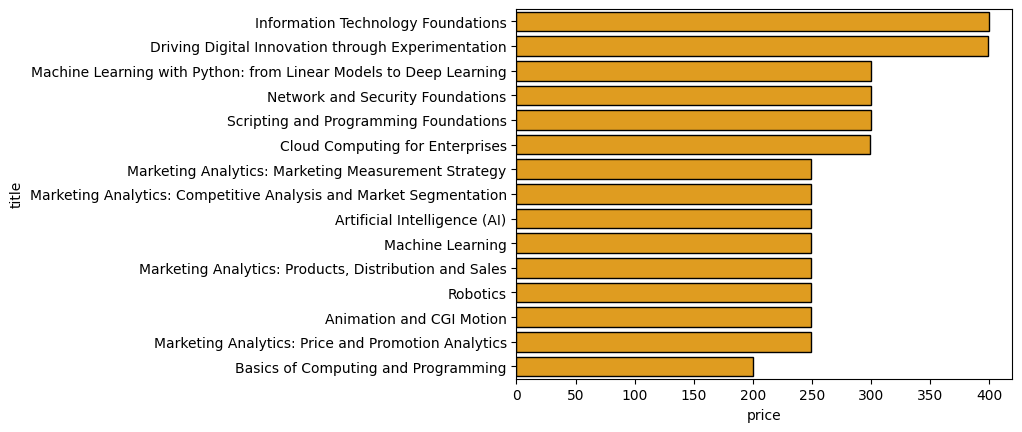

In [184]:

sns.barplot(x = 'price', y = 'title', data = title_comp_sci, color = 'orange', edgecolor='black', ci=False)

<ipython-input-185-a999c68cb8bd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'n_enrolled', y = 'title', data = title_comp_sci, color = 'orange', edgecolor='black', ci=False)


<Axes: xlabel='n_enrolled', ylabel='title'>

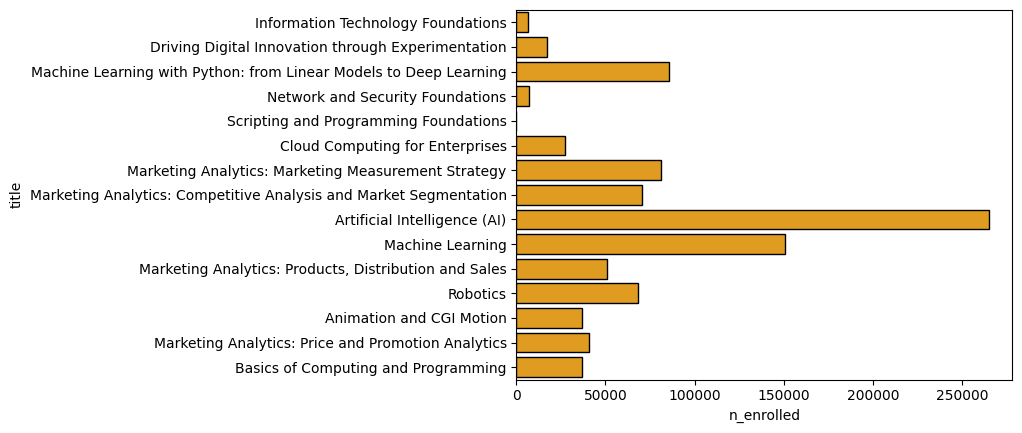

In [185]:
sns.barplot(x = 'n_enrolled', y = 'title', data = title_comp_sci, color = 'orange', edgecolor='black', ci=False)

<ipython-input-186-40f6daaaa8cd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'price', y = 'n_enrolled', data = title_comp_sci, color = 'orange', edgecolor='black', ci=False)


<Axes: xlabel='price', ylabel='n_enrolled'>

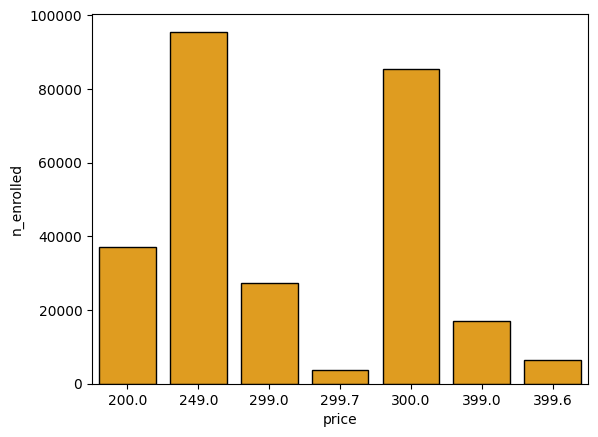

In [186]:
sns.barplot(x = 'price', y = 'n_enrolled', data = title_comp_sci, color = 'orange', edgecolor='black', ci=False)

In [187]:
data_analysis_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses,
                                    AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM edx
                                    WHERE subject in ('Data Analysis & Statistics', 'Computer Science')
                                    ORDER BY price DESC ''', edx_conn)
data_analysis_tot

,total_program_enrollment,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,16712149,238,115.218445,25.0,399.6


In [188]:
comp_sci_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses,
                               AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx
                               WHERE subject == 'Computer Science'
                               ORDER BY price DESC ''', edx_conn)
comp_sci_tot

,total_program_enrollment,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,12447737,166,125.012048,49.0,399.6


In [189]:
edx_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_edx_enrollment, COUNT(title) AS total_courses, AVG(price) AS total_avg
                          FROM edx
                          ORDER BY price DESC ''', edx_conn)
edx_tot

,total_edx_enrollment,total_courses,total_avg
0,45537600,975,100.465497


In [190]:
business_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_business_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase,
                               MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx
                               WHERE subject == 'Business & Management'
                               ORDER BY price DESC ''', edx_conn)
business_tot

,total_business_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,7076563,164,132.542683,5.0,399.0


In [191]:
engineering_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_business_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase,
                               MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx
                               WHERE subject == 'Engineering'
                               ORDER BY price DESC ''', edx_conn)
engineering_tot

,total_business_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,1396839,58,116.982759,25.0,299.0


In [192]:
ed_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_business_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase,
                               MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx
                               WHERE subject == 'Education & Teacher Training'
                               ORDER BY price DESC ''', edx_conn)
ed_tot

,total_business_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,706532,29,83.068966,25.0,299.0


In [193]:
law_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_business_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase,
                               MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx
                               WHERE subject == 'Law'
                               ORDER BY price DESC ''', edx_conn)
law_tot

,total_business_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,291436,10,112.0,25.0,199.0


In [194]:
econ_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_business_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase,
                               MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx
                               WHERE subject == 'Economics & Finance'
                               ORDER BY price DESC ''', edx_conn)
econ_tot

,total_business_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,835907,46,75.649565,5.0,450.0


### 전체 강의대비 각 카테고리 강의 비중

In [195]:
edx_by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM edx) AS subject_pct
                             FROM edx
                             GROUP BY subject
                             ORDER BY subject_pct DESC
                             limit 20''', edx_conn)
edx_by_subject

,subject,subject_count,subject_pct
0,Computer Science,166,17
1,Business & Management,164,16
2,Data Analysis & Statistics,72,7
3,Humanities,64,6
4,Social Sciences,51,5
5,Engineering,58,5
6,Economics & Finance,46,4
7,Communication,39,4
8,Medicine,31,3
9,Math,31,3


In [196]:
edx_by_subject_csv = edx_by_subject.to_csv('edx_by_subject_csv.csv')

### 전체 강의대비 각 카테고리 강의 비중

<ipython-input-197-e7c125e33971>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'subject_pct', y = 'subject', data = edx_by_subject, color = 'green', edgecolor='black', ci=False)


<Axes: xlabel='subject_pct', ylabel='subject'>

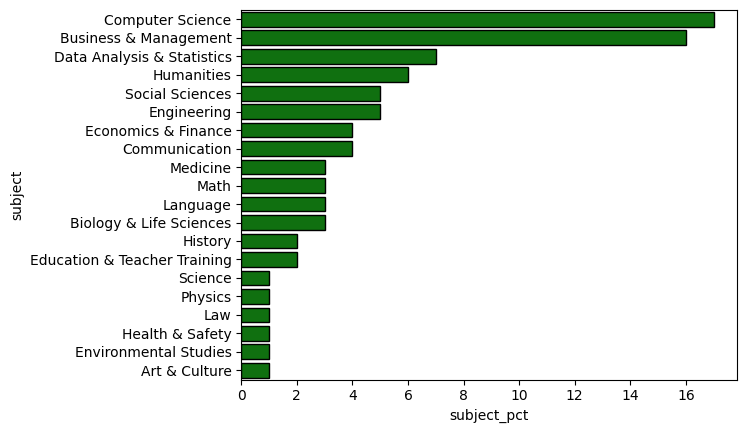

In [197]:
#전체 강의대비 각 카테고리 강의 비중
sns.barplot(x = 'subject_pct', y = 'subject', data = edx_by_subject, color = 'green', edgecolor='black', ci=False)


In [198]:
pd.read_sql(''' select * from edx limit 10''', edx_conn)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,1,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,2,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,1,The University of Michigan,Charles Severance,2,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,unlisted,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,1,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,2,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",unlisted,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,0,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,1,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",unlisted,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,1,"University of California, Berkeley",Stephan Sorger,2,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,unlisted,https://www.edx.org/course/marketing-analytics...
5,Introduction to Project Management,Learn the principles of project management and...,301793,1,University of Adelaide,Frank Schultmann-Noel Lindsay-Anton Jordaan-Jo...,2,Business & Management,English,English,2–3 hours per week,6,199.0,Project management is an essential skill-set f...,unlisted,https://www.edx.org/course/introduction-to-pro...
6,Leading High-Performing Teams,"Learn how to motivate, engage and empower peop...",32847,1,The University of Queensland,Tyler G. Okimoto,1,Communication,English,English,8–10 hours per week,10,5.0,This course will blend business theory and rea...,MODULE 1: INTRODUCTION TO TEAMS\nFocuses on re...,https://www.edx.org/course/leading-high-perfor...
7,The Foundations of Happiness at Work,Learn why happiness at work matters and how to...,67073,1,"University of California, Berkeley",Dacher Keltner-Emiliana Simon-Thomas,2,Business & Management,English,English,2–3 hours per week,4,199.0,This course explains what happiness at work lo...,unlisted,https://www.edx.org/course/the-foundations-of-...
8,"Managing Study, Stress and Mental Health at Un...",Develop a clearer understanding of what mental...,23061,1,Curtin University,Ben Milbourn-Craig Thompson-Sonya Girdler-Fran...,2,Health & Safety,English,English,1–3 hours per week,2,49.0,This short course is a German-Australian colla...,Module 1: Mental fitnessBy the end of this mod...,https://www.edx.org/course/managing-study-stre...
9,Six Sigma: Define and Measure,An introduction to the Six Sigma methodology a...,92411,1,Technische Universität München,Martin Grunow-Holly Ott,2,Business & Management,English,English,3–4 hours per week,8,99.0,Understand the background and meaning of Six S...,Week 1: Six Sigma Introduction\nIntroduction t...,https://www.edx.org/course/six-sigma-define-an...


In [199]:
edx_by_n_enrolled = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count, sum(n_enrolled) as n_enrolled
                             FROM edx
                             GROUP BY subject
                             ORDER BY n_enrolled DESC
                             ''', edx_conn)
edx_by_n_enrolled

,subject,subject_count,n_enrolled
0,Computer Science,166,12447737
1,Business & Management,164,7076563
2,Communication,39,4641327
3,Data Analysis & Statistics,72,4264412
4,Humanities,64,3504140
5,Social Sciences,51,1844379
6,Biology & Life Sciences,35,1763832
7,Engineering,58,1396839
8,Language,34,1063257
9,Medicine,31,989765


### 강의 가격 분포


In [200]:
edx_price_summary = pd.read_sql(''' SELECT subject, avg(n_enrolled) as avg_n_enrolled , avg(price) as avg_price
                             , sum(price) as tot_price
                             FROM edx
                             GROUP BY subject
                             ORDER BY tot_price DESC
                             ''', edx_conn)
edx_price_summary

,subject,avg_n_enrolled,avg_price,tot_price
0,Business & Management,43149.774390,132.542683,21737.00
1,Computer Science,74986.367470,125.012048,20752.00
2,Engineering,24083.431034,116.982759,6785.00
3,Data Analysis & Statistics,59227.944444,92.638750,6669.99
4,Humanities,54752.187500,66.015469,4224.99
5,Social Sciences,36164.294118,75.803922,3866.00
6,Communication,119008.384615,95.282051,3716.00
7,Economics & Finance,18171.891304,75.649565,3479.88
8,Medicine,31927.903226,101.387097,3143.00
9,Biology & Life Sciences,50395.200000,88.514286,3098.00


In [201]:
edx_by_n_enrolled_price = pd.read_sql(''' SELECT subject, title, n_enrolled, price
                             FROM edx

                             ORDER BY n_enrolled DESC
                             ''', edx_conn)
edx_by_n_enrolled_price

,subject,title,n_enrolled,price
0,Computer Science,CS50's Introduction to Computer Science,2442271,90.0
1,Communication,IELTS Academic Test Preparation,1103777,99.0
2,Communication,TOEFL® Test Preparation: The Insider’s Guide,1022489,49.0
3,Computer Science,CS50's Web Programming with Python and JavaScript,698950,90.0
4,Computer Science,Introduction to Linux,642088,199.0
...,...,...,...,...
970,Science,Drones and Autonomous Systems 2: Applications ...,0,149.0
971,Math,MathTrackX: Differential Calculus,0,79.0
972,Social Sciences,Leaders in Citizen Security and Justice Manage...,0,25.0
973,Art & Culture,Pattern Studying and Making | 图案审美与创作,0,139.0


<Axes: xlabel='n_enrolled', ylabel='price'>

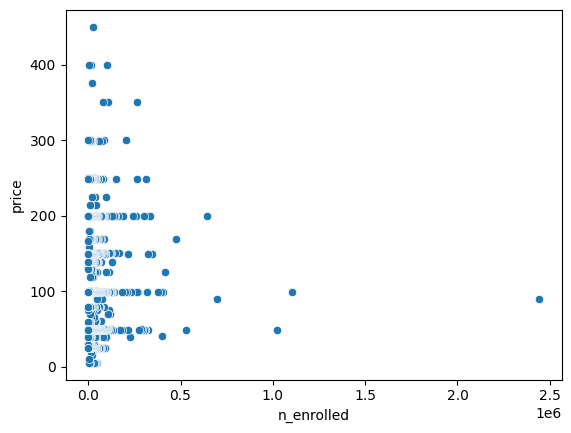

In [202]:
sns.scatterplot(x = 'n_enrolled', y = 'price', data = edx_by_n_enrolled_price)

In [203]:
edx_by_price = pd.read_sql(''' SELECT price, COUNT(price) AS price_count, sum(n_enrolled) as n_enrolled,
                               100 * COUNT(price) / (SELECT COUNT(*) FROM edx) AS price_pct
                               FROM edx
                               GROUP BY price
                               ORDER BY price_pct DESC
                          ''', edx_conn)
edx_by_price

,price,price_count,n_enrolled,price_pct
0,49.00,270,10045535,27
1,99.00,137,9980920,14
2,50.00,96,3192084,9
3,199.00,85,4596439,8
4,149.00,78,2673189,8
5,25.00,49,1223102,5
6,150.00,30,1746238,3
7,139.00,33,1094260,3
8,249.00,26,1466360,2
9,79.00,21,483253,2


In [204]:
edx_price_pct_csv = edx_by_price.to_csv('edx_price_pct.csv')

<ipython-input-205-b97b18772c4f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'price', y = 'price_pct', data = edx_by_price, color = 'GREEN', edgecolor='black', ci=False)


<Axes: xlabel='price', ylabel='price_pct'>

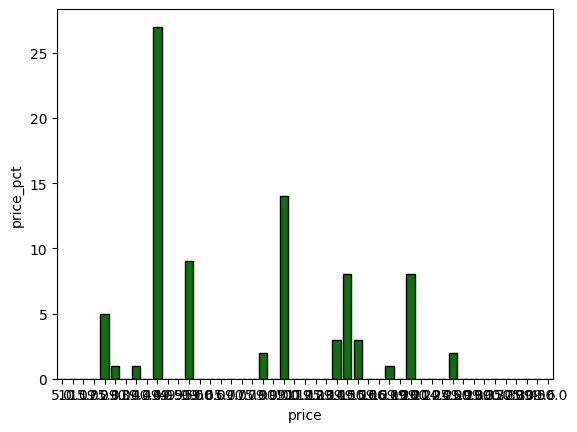

In [205]:
sns.barplot(x = 'price', y = 'price_pct', data = edx_by_price, color = 'GREEN', edgecolor='black', ci=False)

In [206]:
by_institution = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,(SELECT COUNT(*) FROM edx),
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx) AS institution_pct
                                 FROM edx
                                 GROUP BY institution
                                 ORDER BY institution_pct DESC LIMIT 10''', edx_conn)
by_institution

,institution,institution_count,(SELECT COUNT(*) FROM edx),institution_pct
0,Harvard University,104,975,10
1,Universitat Politècnica de Valencia,47,975,4
2,Massachusetts Institute of Technology,41,975,4
3,IBM,30,975,3
4,Delft University of Technology,30,975,3
5,"University of California, Berkeley",20,975,2
6,The University of Queensland,26,975,2
7,The University of Michigan,22,975,2
8,Tecnológico de Monterrey,21,975,2
9,Stanford University,20,975,2


In [207]:
pd.read_sql(''' SELECT *
                                 FROM edx
                                 WHERE institution == 'Harvard University'
                    ''', edx_conn)


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,1,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,2,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",unlisted,https://www.edx.org/course/cs50s-introduction-...
1,Fat Chance: Probability from the Ground Up,Increase your quantitative reasoning skills th...,66835,1,Harvard University,Benedict Gross-Joseph Harris-Emily Riehl,2,Math,English,English,3–5 hours per week,7,49.0,Created specifically for those who are new to ...,1 Basic Counting2 Advanced Counting3 Basic Pro...,https://www.edx.org/course/fat-chance-probabil...
2,Data Science: R Basics,Build a foundation in R and learn how to wrang...,528782,1,Harvard University,Rafael Irizarry,2,Data Analysis & Statistics,English,English,1–2 hours per week,8,49.0,The first in our Professional Certificate Prog...,unlisted,https://www.edx.org/course/data-science-r-basics
3,CS50's Introduction to Artificial Intelligence...,Learn to use machine learning in Python in thi...,258006,1,Harvard University,David J. Malan-Brian Yu,2,Computer Science,English,English,10–30 hours per week,7,199.0,"AI is transforming how we live, work, and play...",unlisted,https://www.edx.org/course/cs50s-introduction-...
4,CS50's Introduction to Game Development,This course is part of a Professional Certificate,346748,1,Harvard University,David J. Malan-Colton Ogden,1,Computer Science,English,English,6–9 hours per week,12,149.0,unlisted,unlisted,https://www.edx.org/course/cs50s-introduction-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Advanced Bioconductor,Learn advanced approaches to genomic visualiza...,26063,1,Harvard University,Rafael Irizarry-Michael Love,0,Data Analysis & Statistics,English,English,2–4 hours per week,4,149.0,"In this course, we begin with approaches to vi...",unlisted,https://www.edx.org/course/advanced-bioconductor
100,Creating Modern China: The Republican Period t...,Explore the birth of modern China with a focus...,43045,1,Harvard University,Peter K. Bol-William C. Kirby,2,History,English,"English, 中文",1–3 hours per week,15,139.0,What does it mean to be modern? What constitut...,unlisted,https://www.edx.org/course/creating-modern-chi...
101,First Nights - Berlioz’s Symphonie Fantastique...,Learn about Hector Berlioz's Symphonie Fantast...,8222,1,Harvard University,Thomas Forrest Kelly,2,Humanities,English,English,3–5 hours per week,3,49.0,Six years after the premiere of Beethoven's mo...,unlisted,https://www.edx.org/course/first-nights-berlio...
102,"Invasions, Rebellions, and the Fall of Imperia...","An overview of modern Chinese history, includi...",41537,1,Harvard University,Peter K. Bol-William C. Kirby,2,History,English,"English, 中文",1–3 hours per week,15,139.0,"In the 18th century, the Qing Dynasty is at it...",unlisted,https://www.edx.org/course/invasions-rebellion...


### 운영 기관별 강좌 분포

<ipython-input-208-ebf553b28753>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'institution_pct', y = 'institution', data = by_institution, color = 'green', edgecolor='black', ci=False)


<Axes: xlabel='institution_pct', ylabel='institution'>

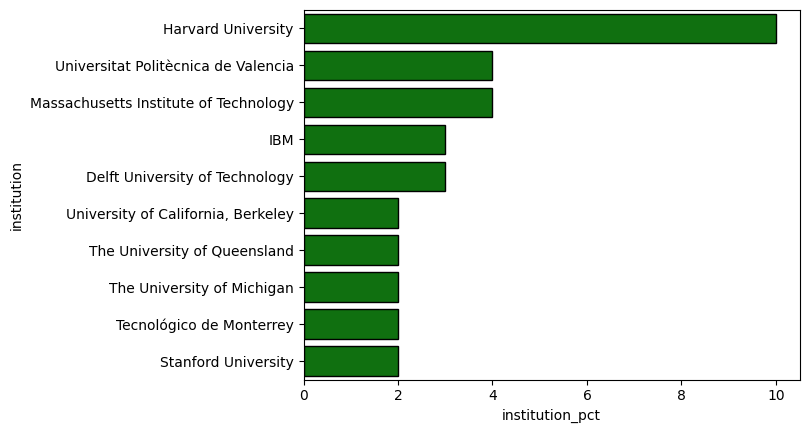

In [208]:
sns.barplot(x = 'institution_pct', y = 'institution', data = by_institution, color = 'green', edgecolor='black', ci=False)

In [209]:
edx.price.describe()

count    975.000000
mean     100.465497
std       69.572175
min        5.000000
25%       49.000000
50%       79.000000
75%      149.000000
max      450.000000
Name: price, dtype: float64

In [210]:
subject_price_over_avg = pd.read_sql(''' SELECT subject, AVG(price) as avg_price_subject
                                  FROM edx
                                  WHERE price > 100.0
                                  GROUP BY subject
                                  ORDER BY avg_price_subject DESC LIMIT 10''', edx_conn)
subject_price_over_avg = subject_price_over_avg.round(2)
subject_price_over_avg

,subject,avg_price_subject
0,Education & Teacher Training,227.00
1,Data Analysis & Statistics,222.38
2,Economics & Finance,213.56
3,Chemistry,199.00
4,Engineering,192.96
5,Computer Science,189.61
6,Environmental Studies,189.00
7,Design,189.00
8,Art & Culture,185.00
9,Business & Management,183.19


<ipython-input-211-436f69c87a3c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'avg_price_subject', y = 'subject', data = subject_price_over_avg, color = 'purple', edgecolor='black', ci=False)


<Axes: xlabel='avg_price_subject', ylabel='subject'>

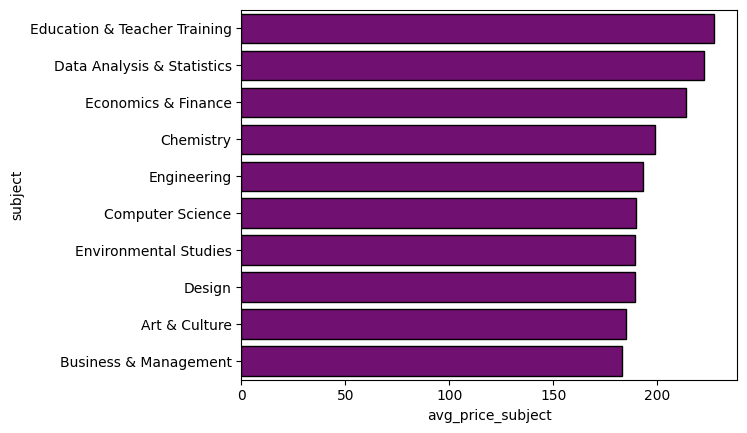

In [211]:
sns.barplot(x = 'avg_price_subject', y = 'subject', data = subject_price_over_avg, color = 'purple', edgecolor='black', ci=False)

In [212]:
by_enroll = pd.read_sql(''' SELECT subject, SUM(n_enrolled) AS total_enrollment
                          FROM edx
                          GROUP BY subject
                          ORDER BY total_enrollment DESC LIMIT 10 ''', edx_conn)
by_enroll

,subject,total_enrollment
0,Computer Science,12447737
1,Business & Management,7076563
2,Communication,4641327
3,Data Analysis & Statistics,4264412
4,Humanities,3504140
5,Social Sciences,1844379
6,Biology & Life Sciences,1763832
7,Engineering,1396839
8,Language,1063257
9,Medicine,989765


In [213]:
by_enroll_csv = by_enroll.to_csv('by_enroll.csv')

<ipython-input-214-92d598087844>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'total_enrollment', y = 'subject', data = by_enroll, color = 'purple', edgecolor='black', ci=False)


<Axes: xlabel='total_enrollment', ylabel='subject'>

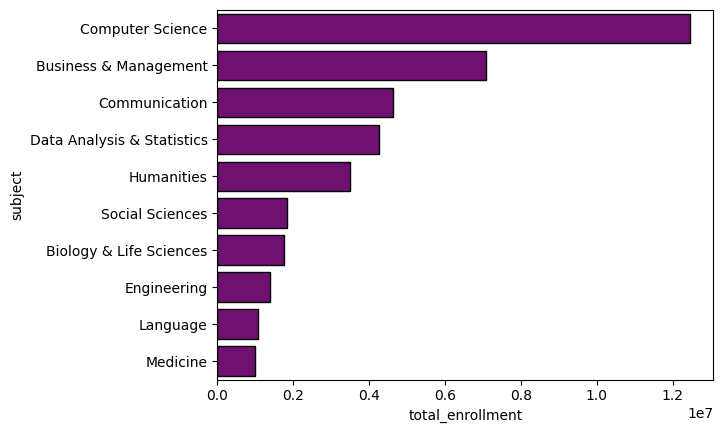

In [214]:
sns.barplot(x = 'total_enrollment', y = 'subject', data = by_enroll, color = 'purple', edgecolor='black', ci=False)

In [215]:
by_avg_enroll = pd.read_sql(''' SELECT subject, AVG(n_enrolled) AS avg_enrollment
                          FROM edx
                          GROUP BY subject
                          ORDER BY avg_enrollment DESC LIMIT 10 ''', edx_conn)
by_avg_enroll

,subject,avg_enrollment
0,Communication,119008.384615
1,Architecture,91322.200000
2,Computer Science,74986.367470
3,Data Analysis & Statistics,59227.944444
4,Humanities,54752.187500
5,Biology & Life Sciences,50395.200000
6,Literature,47898.000000
7,Business & Management,43149.774390
8,Chemistry,39507.000000
9,Social Sciences,36164.294118


<ipython-input-216-9f687743162a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'avg_enrollment', y = 'subject', data = by_avg_enroll, color = 'purple', edgecolor='black', ci=False)


<Axes: xlabel='avg_enrollment', ylabel='subject'>

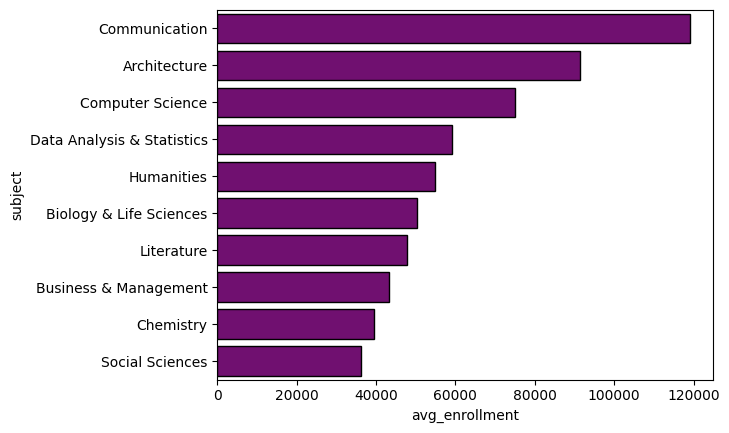

In [216]:
sns.barplot(x = 'avg_enrollment', y = 'subject', data = by_avg_enroll, color = 'purple', edgecolor='black', ci=False)

In [217]:
udemy = pd.read_csv('/content/drive/MyDrive/portfolio/udemy_courses.csv')
udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [218]:
udemy.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [219]:
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'])

In [220]:
udemy['level'] = udemy['level'].astype('category')
udemy['level'] = udemy['level'].cat.codes

In [221]:
udemy['is_paid'] = udemy['is_paid'].astype('category')
udemy['is_paid'] = udemy['is_paid'].cat.codes

In [222]:
udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [223]:
Path('udemy.db').touch()
udemy_conn = sqlite3.connect('udemy.db')
udemy_cursor = udemy_conn.cursor()

In [224]:
udemy.to_sql('udemy', udemy_conn, if_exists='append', index=False)

3678

In [225]:
udemy_query = pd.read_sql(''' SELECT *
                              FROM udemy ''', udemy_conn)
udemy_query

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
7351,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
7352,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
7353,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
7354,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [226]:
udemy['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [227]:
by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_cnt,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM udemy) AS subject_pct
                             FROM udemy
                             GROUP BY subject
                             ORDER BY subject_pct DESC ''', udemy_conn)
by_subject

,subject,subject_cnt,subject_pct
0,Web Development,2400,32
1,Business Finance,2390,32
2,Musical Instruments,1360,18
3,Graphic Design,1206,16


<ipython-input-228-0e4a98076bd1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'subject_pct', y = 'subject', data = by_subject, color = 'blue', edgecolor = 'black', ci=False)


<Axes: xlabel='subject_pct', ylabel='subject'>

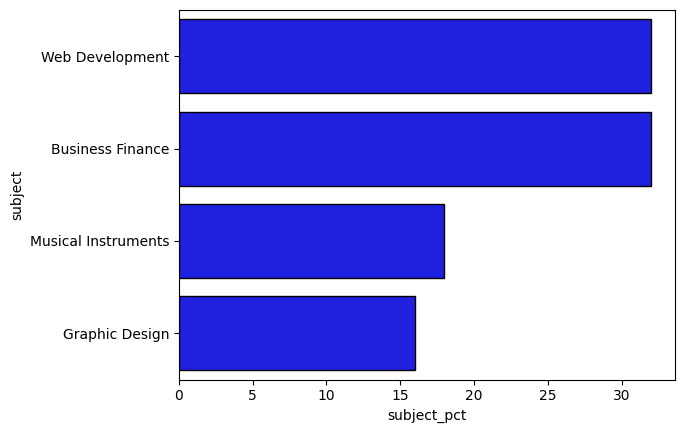

In [228]:
sns.barplot(x = 'subject_pct', y = 'subject', data = by_subject, color = 'blue', edgecolor = 'black', ci=False)

In [229]:
by_price = pd.read_sql(''' SELECT price, COUNT(price) AS subject_count,
                             100 * COUNT(price) / (SELECT COUNT(*) FROM udemy) AS price_pct
                             FROM udemy
                             GROUP BY price
                             ORDER BY price_pct DESC limit 17 ''', udemy_conn)
by_price

,price,subject_count,price_pct
0,20,1660,22
1,50,936,12
2,200,590,8
3,0,620,8
4,40,434,5
5,95,304,4
6,30,332,4
7,25,308,4
8,195,254,3
9,100,266,3


<ipython-input-230-11abaebacee4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'price', y = 'price_pct', data = by_price, color = 'blue', edgecolor = 'black', ci=False)


<Axes: xlabel='price', ylabel='price_pct'>

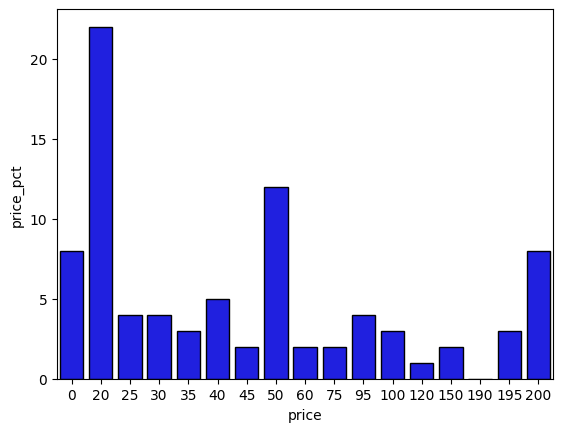

In [230]:
sns.barplot(x = 'price', y = 'price_pct', data = by_price, color = 'blue', edgecolor = 'black', ci=False)

In [231]:
#by_price['price'] = by_price['price'].astype(str)
#by_price.dtypes

udemy_by_price_csv = by_price.to_csv('udemy_by_price.csv')
udemy_by_price_csv

In [232]:
by_subs_subject = pd.read_sql(''' SELECT course_title, subject, sum(num_subscribers) as num_subscribers
                                  FROM udemy
                                  GROUP BY subject
                                  ORDER BY num_subscribers DESC ''', udemy_conn)

by_subs_subject

,course_title,subject,num_subscribers
0,Learn Web Designing & HTML5/CSS3 Essentials in...,Web Development,15961144
1,Ultimate Investment Banking Course,Business Finance,3737422
2,Anatomy and Figure Drawing for Beginners,Graphic Design,2126296
3,"7 Ways A Beginner Guitarist Can Sound Better, ...",Musical Instruments,1693378


### Udemy에서 가장 많이 구독하는 과정 10개 중 9개가 웹 개발에 있다.

In [233]:
udemy_by_subs = pd.read_sql(''' SELECT course_title, subject, num_subscribers
                                FROM udemy
                                ORDER BY num_subscribers DESC limit 10 ''', udemy_conn)
udemy_by_subs

,course_title,subject,num_subscribers
0,Learn HTML5 Programming From Scratch,Web Development,268923
1,Learn HTML5 Programming From Scratch,Web Development,268923
2,Coding for Entrepreneurs Basic,Web Development,161029
3,Coding for Entrepreneurs Basic,Web Development,161029
4,The Web Developer Bootcamp,Web Development,121584
5,The Web Developer Bootcamp,Web Development,121584
6,Build Your First Website in 1 Week with HTML5 ...,Web Development,120291
7,Build Your First Website in 1 Week with HTML5 ...,Web Development,120291
8,The Complete Web Developer Course 2.0,Web Development,114512
9,The Complete Web Developer Course 2.0,Web Development,114512


<ipython-input-234-74ddd6d25028>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'num_subscribers', y = 'course_title', hue = 'subject', data = udemy_by_subs, color = 'blue', edgecolor='black', ci=False)


<Axes: xlabel='num_subscribers', ylabel='course_title'>

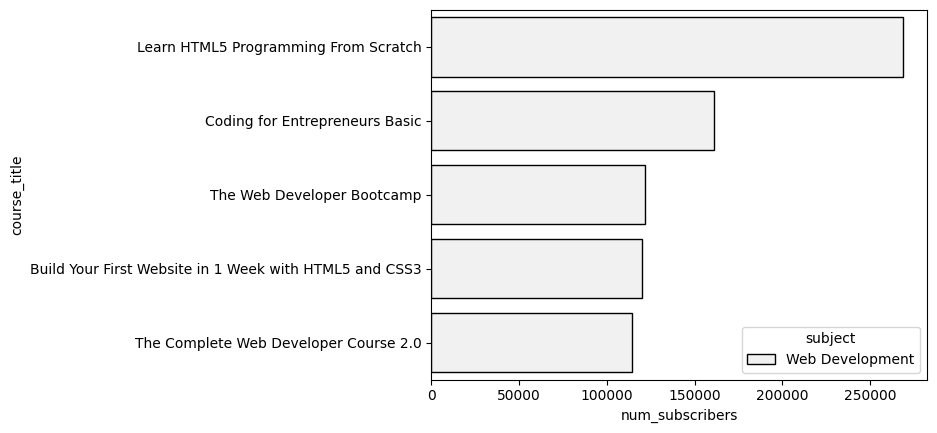

In [234]:
sns.barplot(x = 'num_subscribers', y = 'course_title', hue = 'subject', data = udemy_by_subs, color = 'blue', edgecolor='black', ci=False)

In [235]:
udemy_by_subs_csv = udemy_by_subs.to_csv('udemy_by_subs.csv')

In [236]:
by_reviews = pd.read_sql(''' SELECT course_title, subject, num_reviews
                             FROM udemy
                             ORDER BY num_reviews DESC limit 15 ''', udemy_conn)
by_reviews

,course_title,subject,num_reviews
0,The Web Developer Bootcamp,Web Development,27445
1,The Web Developer Bootcamp,Web Development,27445
2,The Complete Web Developer Course 2.0,Web Development,22412
3,The Complete Web Developer Course 2.0,Web Development,22412
4,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,19649
5,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,19649
6,JavaScript: Understanding the Weird Parts,Web Development,16976
7,JavaScript: Understanding the Weird Parts,Web Development,16976
8,Modern React with Redux,Web Development,15117
9,Modern React with Redux,Web Development,15117


<ipython-input-237-5bcdfb07cab4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'num_reviews', y = 'course_title', data = by_reviews, color = 'purple', edgecolor = 'black', ci=False)


<Axes: xlabel='num_reviews', ylabel='course_title'>

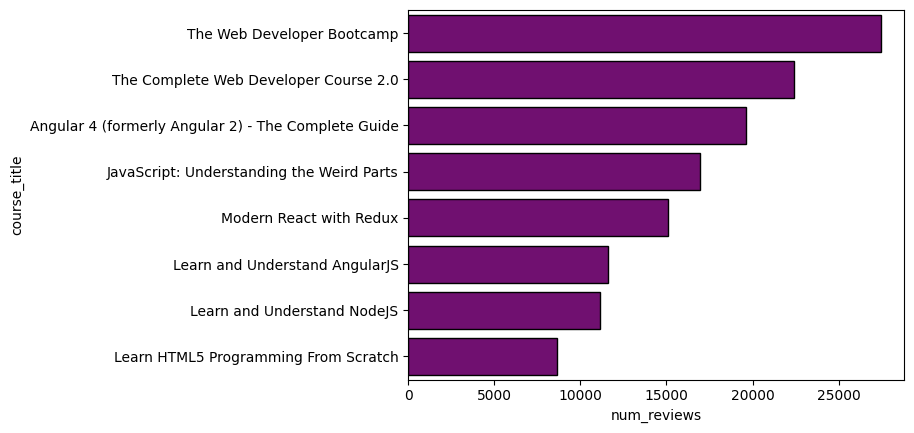

In [237]:
sns.barplot(x = 'num_reviews', y = 'course_title', data = by_reviews, color = 'purple', edgecolor = 'black', ci=False)

In [238]:
reviews_lec = pd.read_sql(''' SELECT course_title, subject, num_lectures, num_reviews
                              FROM udemy
                              ORDER BY num_reviews DESC''', udemy_conn)
reviews_lec

,course_title,subject,num_lectures,num_reviews
0,The Web Developer Bootcamp,Web Development,342,27445
1,The Web Developer Bootcamp,Web Development,342,27445
2,The Complete Web Developer Course 2.0,Web Development,304,22412
3,The Complete Web Developer Course 2.0,Web Development,304,22412
4,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,329,19649
...,...,...,...,...
7351,Effective Personal Website Building and Hosting,Web Development,11,0
7352,Angular 4 Front To Back,Web Development,68,0
7353,XSD :basics for beginners,Web Development,7,0
7354,AppML :basics for beginners,Web Development,8,0


In [239]:
reviews_lec.dtypes

course_title    object
subject         object
num_lectures     int64
num_reviews      int64
dtype: object

<Axes: xlabel='num_lectures', ylabel='num_reviews'>

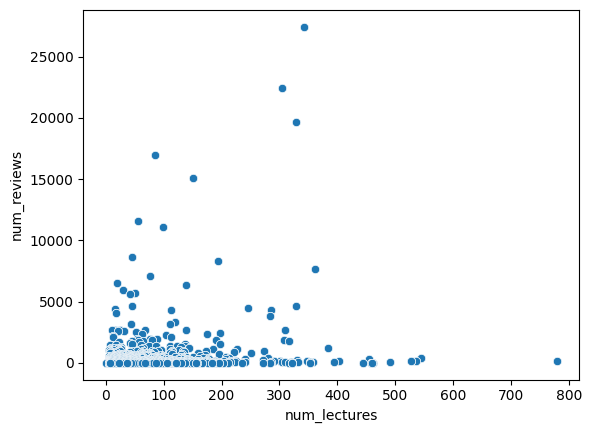

In [240]:
sns.scatterplot(x = 'num_lectures', y = 'num_reviews', data = reviews_lec)

In [241]:
reviews_lec.dtypes

course_title    object
subject         object
num_lectures     int64
num_reviews      int64
dtype: object

In [242]:
reviews_duration = pd.read_sql(''' SELECT course_title, subject, num_lectures,
                                   num_reviews, content_duration, price
                                   FROM udemy
                                   ORDER BY num_reviews DESC''', udemy_conn)
reviews_duration

,course_title,subject,num_lectures,num_reviews,content_duration,price
0,The Web Developer Bootcamp,Web Development,342,27445,43.000000,200
1,The Web Developer Bootcamp,Web Development,342,27445,43.000000,200
2,The Complete Web Developer Course 2.0,Web Development,304,22412,30.500000,200
3,The Complete Web Developer Course 2.0,Web Development,304,22412,30.500000,200
4,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,329,19649,22.000000,190
...,...,...,...,...,...,...
7351,Effective Personal Website Building and Hosting,Web Development,11,0,1.000000,20
7352,Angular 4 Front To Back,Web Development,68,0,8.500000,40
7353,XSD :basics for beginners,Web Development,7,0,0.700000,35
7354,AppML :basics for beginners,Web Development,8,0,0.633333,30


<Axes: xlabel='content_duration', ylabel='num_reviews'>

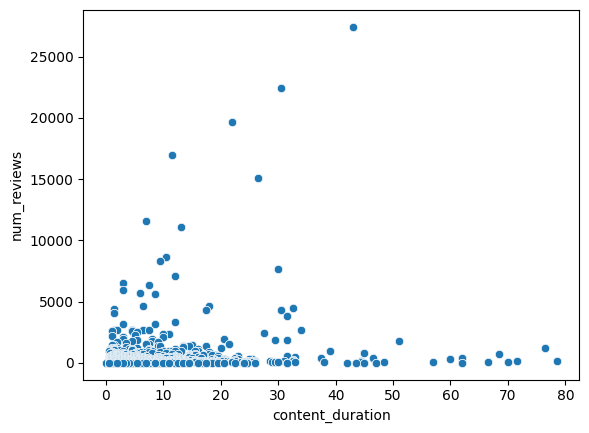

In [243]:
sns.scatterplot(x = 'content_duration', y = 'num_reviews', data = reviews_duration)

<Axes: xlabel='price', ylabel='num_reviews'>

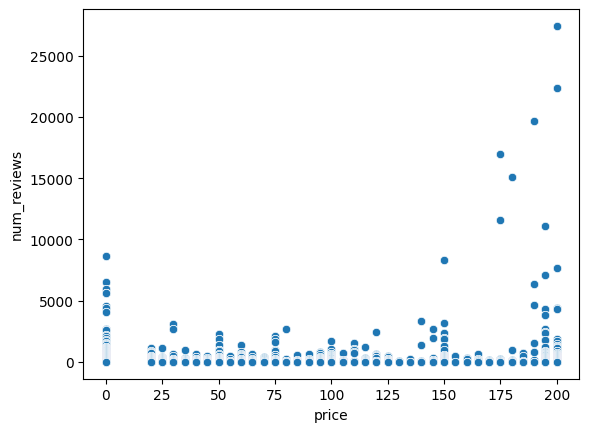

In [244]:
sns.scatterplot(x = 'price', y = 'num_reviews', data = reviews_duration)

<Axes: xlabel='price', ylabel='num_lectures'>

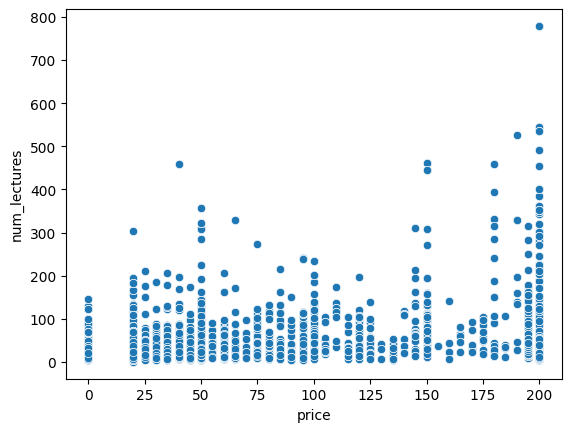

In [245]:
sns.scatterplot(x = 'price', y = 'num_lectures', data = reviews_duration)

In [246]:
reviews_duration_csv = reviews_duration.to_csv('udemy_reviews_duration.csv')

In [247]:
reviews_duration_summary = pd.read_sql(''' SELECT subject,
                                   avg(num_lectures) as num_lectures,
                                   avg(num_reviews) as num_reviews
                                   ,avg(content_duration) as content_duration

                                   FROM udemy
                                   where content_duration > 0 and num_reviews >0
                                   GROUP BY subject

                                   ORDER BY num_reviews DESC''', udemy_conn)
reviews_duration_summary

,subject,num_lectures,num_reviews,content_duration
0,Web Development,52.940586,359.853556,5.607462
1,Graphic Design,33.855491,71.425819,3.790816
2,Business Finance,33.605190,70.344764,3.641041
3,Musical Instruments,39.843960,53.228188,2.970246


In [248]:
reviews_duration_summary2 = pd.read_sql(''' SELECT *
                                   FROM udemy
                                   where content_duration < 30 and num_reviews >0

                                   ORDER BY num_reviews DESC''', udemy_conn)
reviews_duration_summary2

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,1,190,73783,19649,329,0,22.000000,2016-02-11 07:29:29+00:00,Web Development
1,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,1,190,73783,19649,329,0,22.000000,2016-02-11 07:29:29+00:00,Web Development
2,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,1,175,79612,16976,85,0,11.500000,2015-03-12 23:19:54+00:00,Web Development
3,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,1,175,79612,16976,85,0,11.500000,2015-03-12 23:19:54+00:00,Web Development
4,705264,Modern React with Redux,https://www.udemy.com/react-redux/,1,180,50815,15117,150,0,26.500000,2015-12-28 19:20:21+00:00,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
6695,618370,Instant Harmonica - play jazzy Autumn Leaves n...,https://www.udemy.com/instant-harmonica-play-j...,1,20,19,1,9,1,0.533333,2015-10-19 20:13:21+00:00,Musical Instruments
6696,200722,Jazz Guitar Reharmonization for Autumn Leaves,https://www.udemy.com/jazz-guitar-reharmonizat...,1,20,30,1,15,0,0.616667,2014-07-03 09:25:51+00:00,Musical Instruments
6697,211714,Aprende diferentes ritmos con la guitarra rítmica,https://www.udemy.com/curso-de-guitarra-electr...,1,20,10,1,12,0,1.000000,2014-05-07 21:32:43+00:00,Musical Instruments
6698,967422,XML DOM :basics for beginners,https://www.udemy.com/xml-dom-basics-for-begin...,1,35,920,1,7,0,0.700000,2016-09-26 16:47:11+00:00,Web Development


In [249]:
pd.read_sql('''select min(published_timestamp) as mindate, max(published_timestamp) as maxdate, subject
from udemy
group by subject  ''' , udemy_conn)

,mindate,maxdate,subject
0,2012-06-27 16:41:09+00:00,2017-07-06 21:46:30+00:00,Business Finance
1,2012-04-04 02:24:51+00:00,2017-07-06 03:32:48+00:00,Graphic Design
2,2012-01-26 05:36:39+00:00,2017-07-06 16:12:34+00:00,Musical Instruments
3,2011-07-09 05:43:31+00:00,2017-07-06 15:04:55+00:00,Web Development


In [250]:
tot_price = pd.read_sql(''' SELECT subject, SUM(num_subscribers) AS tot_subscribers, avg(num_subscribers) as avg_subscriber,
                            AVG(price) AS avg_course_price, SUM(price) AS total_revenue
                            FROM udemy
                            GROUP BY subject
                            ORDER BY  total_revenue DESC ''', udemy_conn)
tot_price

,subject,tot_subscribers,avg_subscriber,avg_course_price,total_revenue
0,Web Development,15961144,6650.476667,77.033333,184880
1,Business Finance,3737422,1563.774895,68.552301,163840
2,Graphic Design,2126296,1763.097844,57.827529,69740
3,Musical Instruments,1693378,1245.130882,49.558824,67400


<ipython-input-251-67f896480a58>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'subject', y = 'total_revenue', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Web Development'),
  Text(1, 0, 'Business Finance'),
  Text(2, 0, 'Graphic Design'),
  Text(3, 0, 'Musical Instruments')])

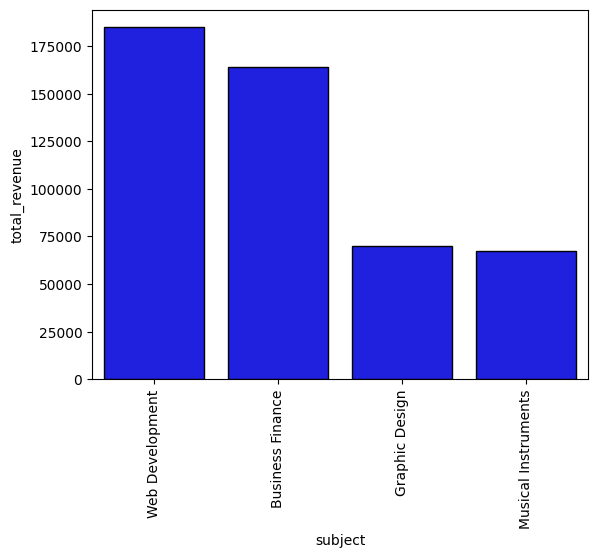

In [251]:
sns.barplot(x = 'subject', y = 'total_revenue', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)
plt.xticks(rotation=90)

<ipython-input-252-b6b8262ce2a7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'subject', y = 'avg_course_price', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Web Development'),
  Text(1, 0, 'Business Finance'),
  Text(2, 0, 'Graphic Design'),
  Text(3, 0, 'Musical Instruments')])

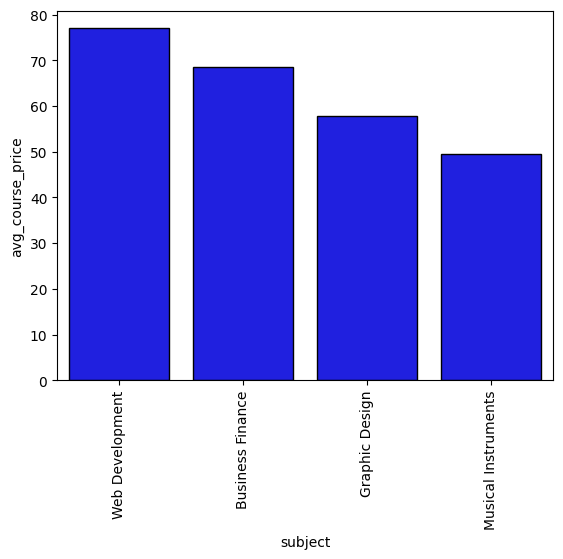

In [252]:
sns.barplot(x = 'subject', y = 'avg_course_price', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)
plt.xticks(rotation=90)

In [253]:
udemy_tot_price = tot_price.to_csv('udemy_avg_price.csv')